In [69]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict


# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [70]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Houston Condo Regression

In [71]:
file_path = Path("../Resources/hou_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,82165.0,"Houston, TX",-45.011444,-1.920603
1996-02-29,82546.0,"Houston, TX",0.463701,-45.011444
1996-03-31,82595.0,"Houston, TX",0.059361,0.463701
1996-04-30,82936.0,"Houston, TX",0.412858,0.059361
1996-05-31,83071.0,"Houston, TX",0.162776,0.412858


<AxesSubplot:xlabel='date'>

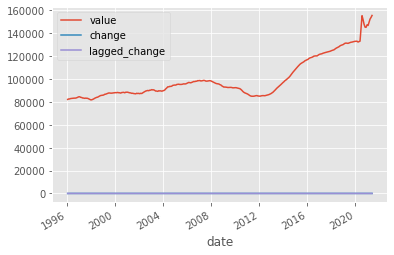

In [72]:
metro_df.plot()

In [73]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [74]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [75]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [76]:
predicted_y_values = model.predict(X)
predicted_y_values

array([0.05842914, 0.06360238, 0.0581429 , 0.05819144, 0.058149  ,
       0.05817903, 0.05817487, 0.05819583, 0.0581866 , 0.05819943,
       0.05815866, 0.05814128, 0.05813869, 0.05818989, 0.05826805,
       0.05822115, 0.05826   , 0.05820792, 0.05822896, 0.05817647,
       0.05821788, 0.05820507, 0.05825982, 0.05825665, 0.05826787,
       0.05819578, 0.05814825, 0.05813969, 0.05811453, 0.05814486,
       0.05813576, 0.05817169, 0.0581241 , 0.05813008, 0.05813921,
       0.05818482, 0.05817292, 0.05817438, 0.05811526, 0.05818055,
       0.05814875, 0.05815847, 0.05814775, 0.05819912, 0.05821621,
       0.05819857, 0.05817501, 0.05818695, 0.05817945, 0.0581863 ,
       0.05821042, 0.05817062, 0.05822972, 0.05820402, 0.05824032,
       0.05812997, 0.05818822, 0.05818456, 0.05825278, 0.05812978,
       0.05820427, 0.05819205, 0.05823928, 0.05822853, 0.0582129 ,
       0.05824668, 0.05818869, 0.058236  , 0.0582181 , 0.05820945,
       0.0581339 , 0.05822737, 0.0581796 , 0.05823933, 0.05815

In [77]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.05819856816892499

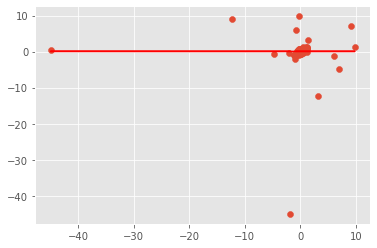

In [78]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [79]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [80]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 1.4439054840664767e-08
R-squared (R2 ): 1.4439054840664767e-08
Mean Squared Error (MSE): 8.392002571299159
Root Mean Squared Error (RMSE): 2.896895333162584
Standard Deviation: 2.8968953540767997


In [81]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [82]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [83]:
# Train the data
#classifier.fit(X_train, y_train)

In [84]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [85]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [86]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [87]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [88]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [89]:
# Predict Percent Change of Housing Prices using a 10 month window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [90]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [91]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#scaler = MinMaxScaler()
#scaler.fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler.fit(y)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [92]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [94]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 10
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [95]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [96]:
# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 3, 10)             480       
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 3, 10)             840       
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [97]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
239/239 [==============================] - 5s 2ms/step - loss: 0.1906
Epoch 2/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1554
Epoch 3/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1530
Epoch 4/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1403
Epoch 5/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1429
Epoch 6/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1363
Epoch 7/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1390
Epoch 8/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1351
Epoch 9/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1368
Epoch 10/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1347


In [98]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 3ms/step - loss: 6.5514


6.551393508911133

In [99]:
# Make some predictions
predicted = model.predict(X_test)

In [100]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [101]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.tail()

,Real,Predicted
date,,
2021-01-31,18.866454,8.271420
2021-02-28,-29.557171,-9.887485
2021-03-31,-55.070598,-7.458404
2021-04-30,-33.265478,1.279934
2021-05-31,-37.555980,-20.274405


<AxesSubplot:xlabel='date'>

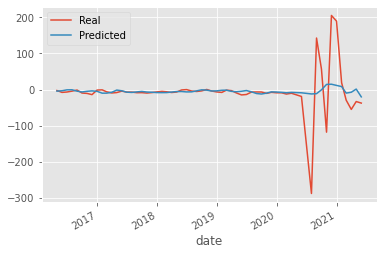

In [102]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [103]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)